# Analyse de trajectoires par clustering (K-Medoids) avec TCA

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
from trajectoryclusteringanalysis.tca import TCA

In [2]:
# Chargement des données MVAD (exemple)
df = pd.read_csv('../data/mvad_data.csv') # Ajout d'une colonne identifiant unique
df.insert(0, 'id', df.index)
df.head()

,id,Sep.93,Oct.93,Nov.93,Dec.93,Jan.94,Feb.94,Mar.94,Apr.94,May.94,...,Sep.98,Oct.98,Nov.98,Dec.98,Jan.99,Feb.99,Mar.99,Apr.99,May.99,Jun.99
0,0,EM,EM,EM,EM,TR,TR,EM,EM,EM,...,EM,EM,EM,EM,EM,EM,EM,EM,EM,EM
1,1,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
2,2,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,EM,EM,EM,EM,EM,EM,EM,JL,JL
3,3,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,JL,JL,JL,JL,JL,JL,JL,JL,JL
4,4,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE


## Étape 2 – Initialisation de l’objet TCA

In [3]:
# Initialisation de l'objet TCA avec les états possibles
tca = TCA(data=df,
              id='id',
              alphabet=["EM", "FE", "HE", "JL", "SC", "TR"],
              states=["employment", "FE", "HE", "joblessness","school", "training"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (712, 71)
state coding:
   alphabet        label  label encoded
0       EM   employment              1
1       FE           FE              2
2       HE           HE              3
3       JL  joblessness              4
4       SC       school              5
5       TR     training              6


## Étape 3 – Clustering avec K-Medoids

On utilise ici la méthode K-Medoids (`fasterpam`) sur la matrice de distances Hamming.


In [4]:
# Calcul de la matrice de distances entre trajectoires
# Ici, on utilise la distance de Hamming, mais vous pouvez aussi utiliser :
# - 'dtw' (Dynamic Time Warping)
# - 'optimal_matching'
# - 'gak' (Global Alignment Kernel)
# - ou toute autre distance supportée par TCA
distance_matrix = tca.compute_distance_matrix(metric='dtw', substitution_cost_matrix=None)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: dtw...
100%|██████████| 712/712 [00:43<00:00, 16.49it/s] 
INFO:root:Time taken for computation: 43.18 seconds


distance matrix :
 [[0.         0.20303815 0.17612611 ... 0.21946131 0.15518258 0.14285714]
 [0.20303815 0.         0.29554516 ... 0.14285714 0.30505938 0.40957918]
 [0.17612611 0.29554516 0.         ... 0.11428571 0.11065667 0.10301575]
 ...
 [0.21946131 0.14285714 0.11428571 ... 0.         0.15649216 0.21285235]
 [0.15518258 0.30505938 0.11065667 ... 0.15649216 0.         0.06060915]
 [0.14285714 0.40957918 0.10301575 ... 0.21285235 0.06060915 0.        ]]


In [5]:
# Clustering K-Medoids sur la matrice de distances
# Vous pouvez ajuster le nombre de clusters et la méthode ('fasterpam', "fastpam1", "pam", "alternate", "fastermsc", "fastmsc", "pamsil" or "pammedsil")
kmedoids_labels, medoid_indices, inertia = tca.kmedoids_clustering(distance_matrix, num_clusters=4,method='fasterpam')

INFO:root:Performing K-Medoids clustering with 4 clusters...
INFO:root:K-Medoids clustering completed.


In [6]:
# Affichage des résultats du clustering
print("kmedoids_labels :\n", np.unique(kmedoids_labels))
print("medoid_indices :\n", medoid_indices)
print("inertia :\n", inertia)

kmedoids_labels :
 [1 2 3 4]
medoid_indices :
 [378 133 258 298]
inertia :
 46.86888311914838


## Étape 4 – Visualisation : lissage des trajectoires (filtre modal)

Le filtre modal de taille `(10, 7)` permet un lissage spatial et temporel, utile pour des données bruitées.


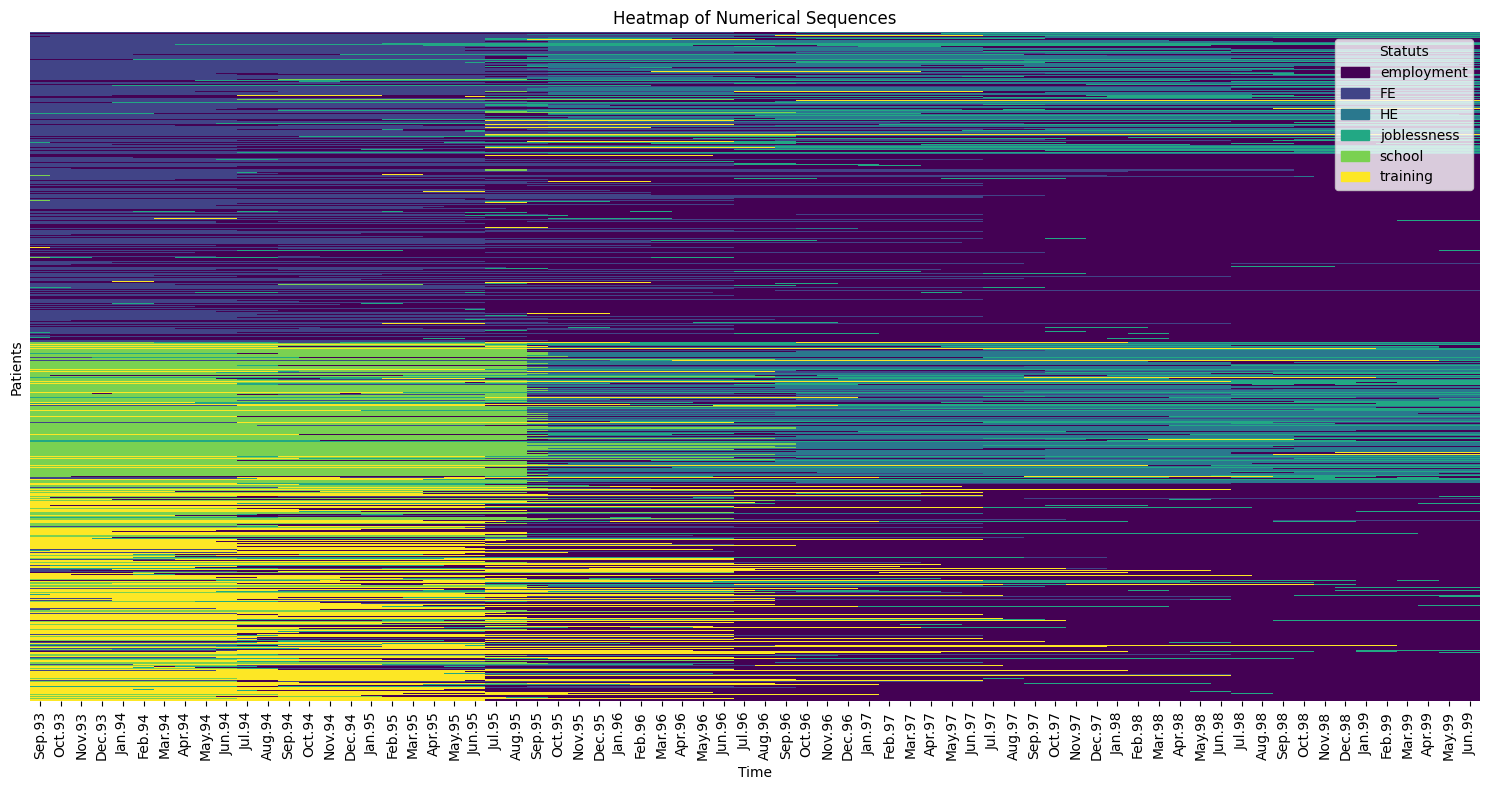

In [7]:
# Visualisation : heatmap des trajectoires, sans filtre modal
tca.plot_filtered_heatmap(labels=kmedoids_labels, kernel_size=(0, 0))  # Pas de filtre modal

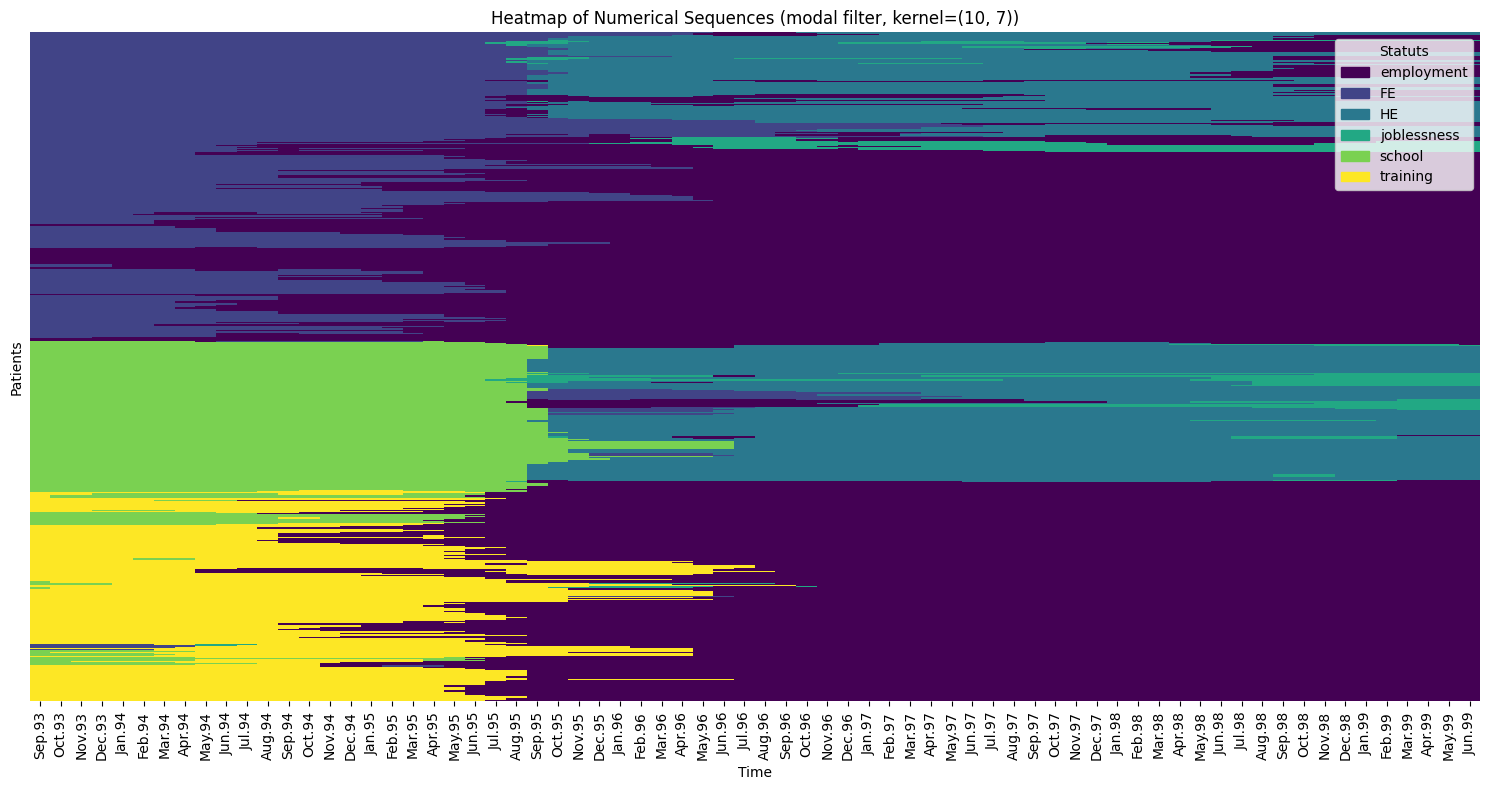

In [8]:
# Visualisation : heatmap des trajectoires, avec filtre modal (lissage local)
tca.plot_filtered_heatmap(labels=kmedoids_labels, kernel_size=(10, 7))

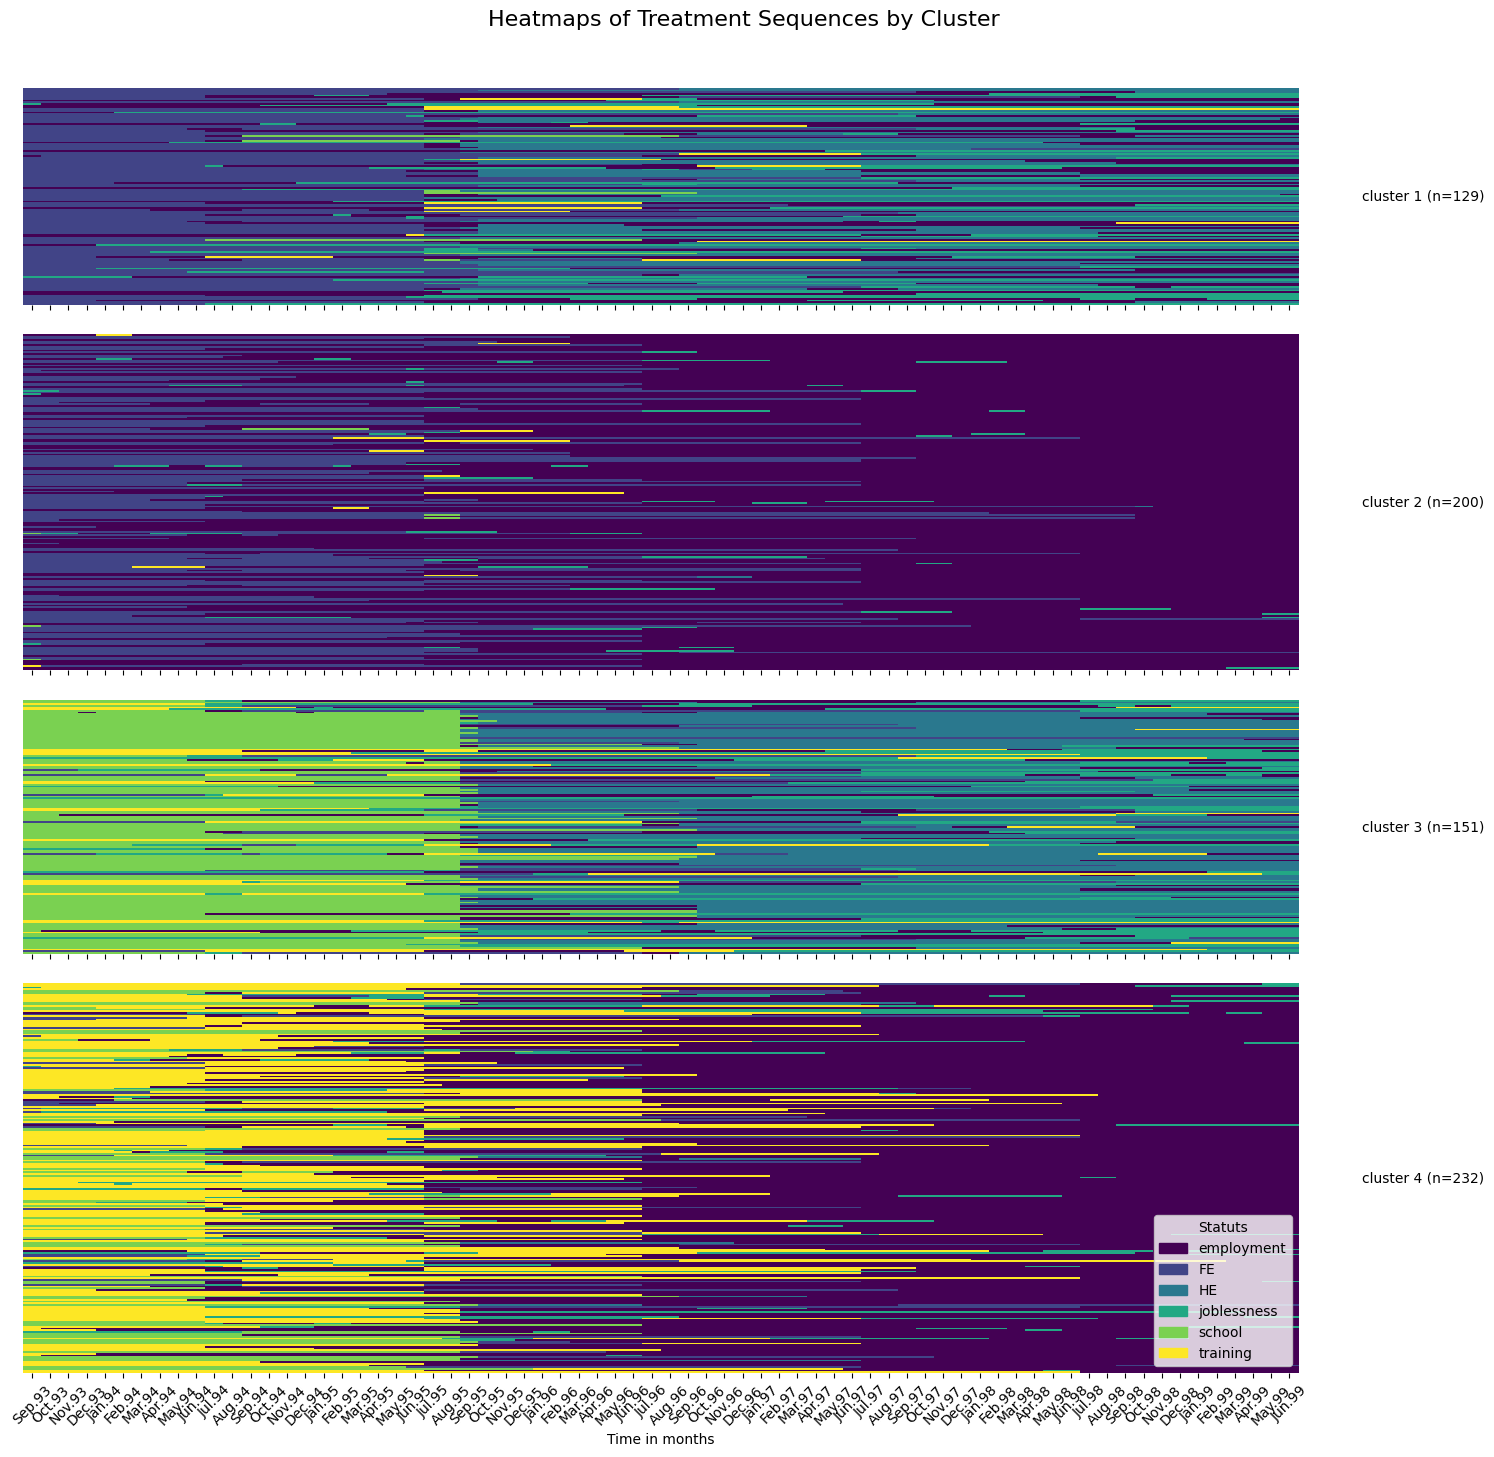

In [9]:
tca.plot_cluster_heatmaps(kmedoids_labels, sorted=False)

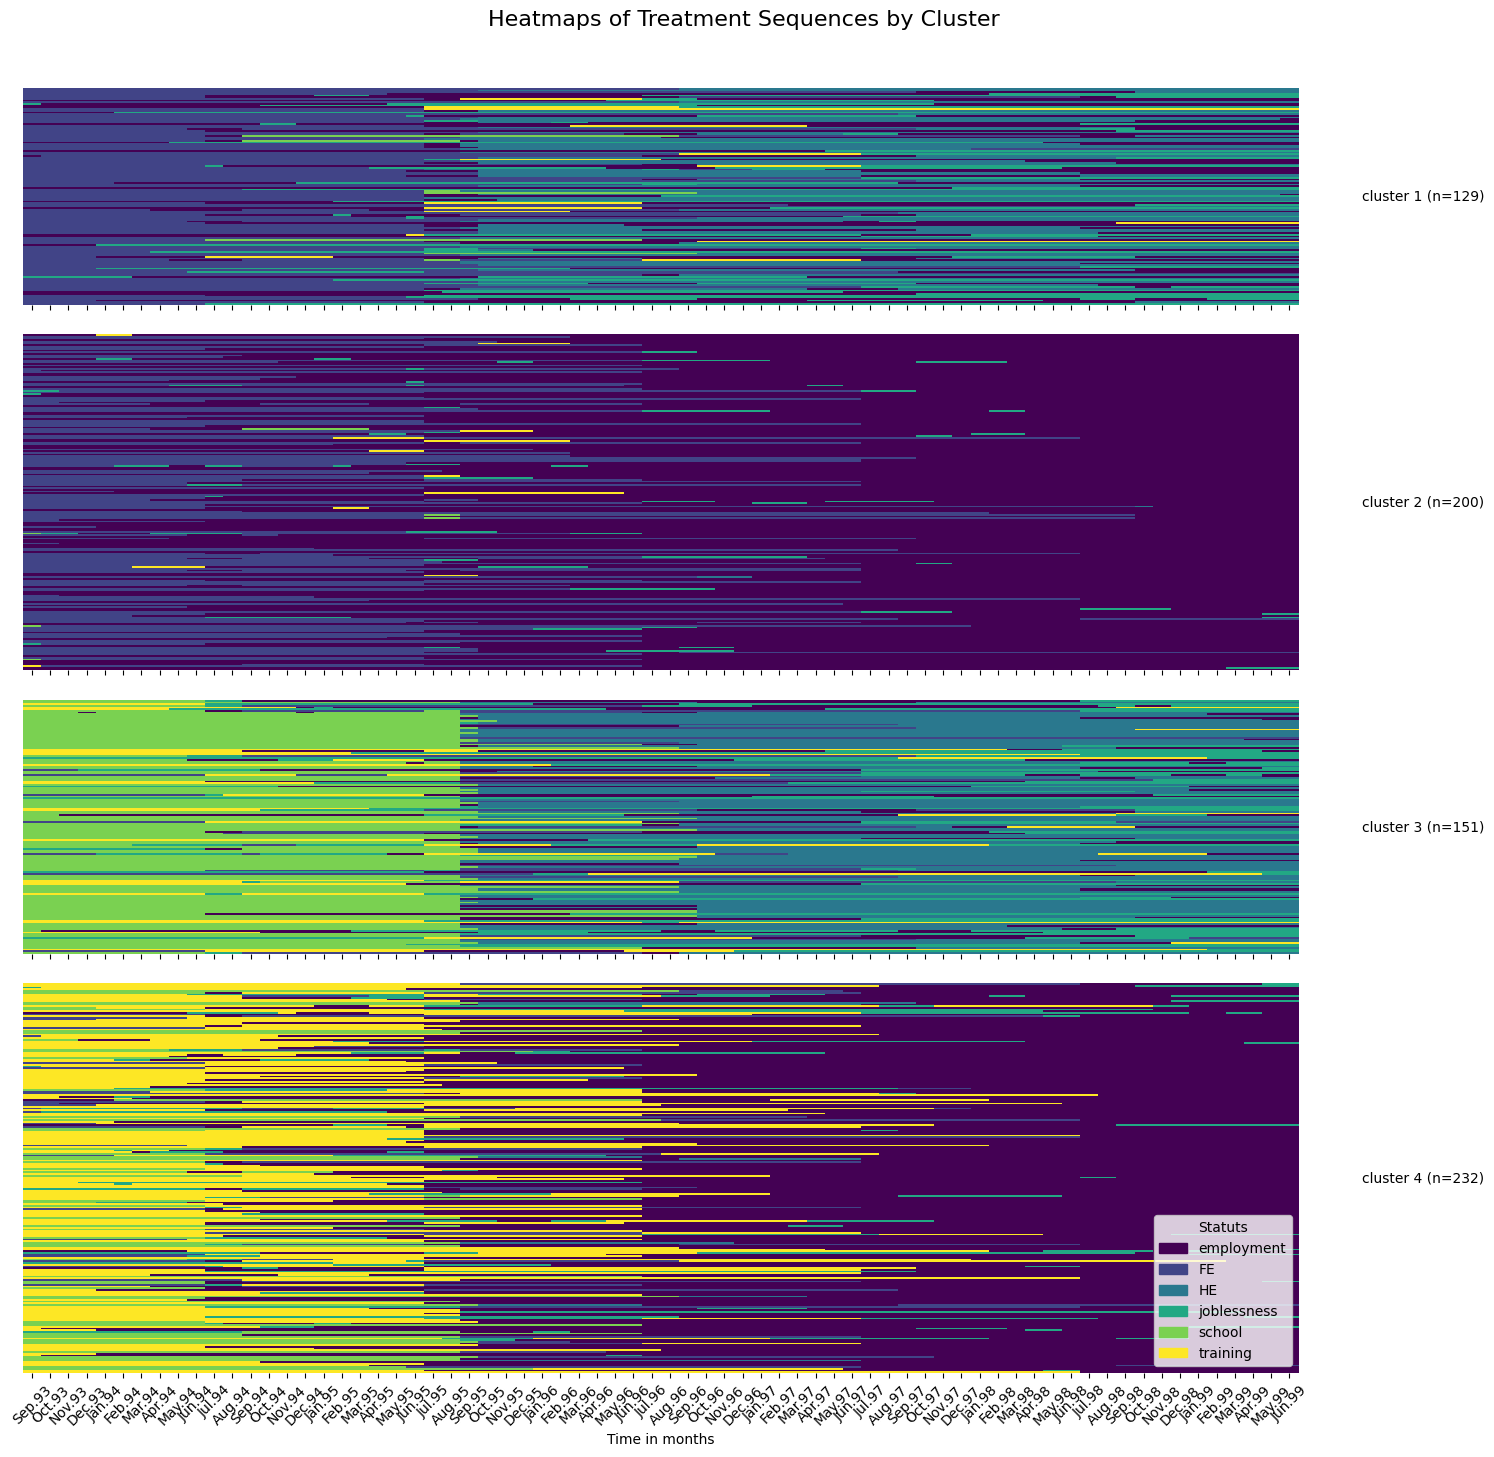

In [10]:
# Visualisation : heatmap par cluster
tca.plot_cluster_heatmaps(kmedoids_labels, sorted=True)

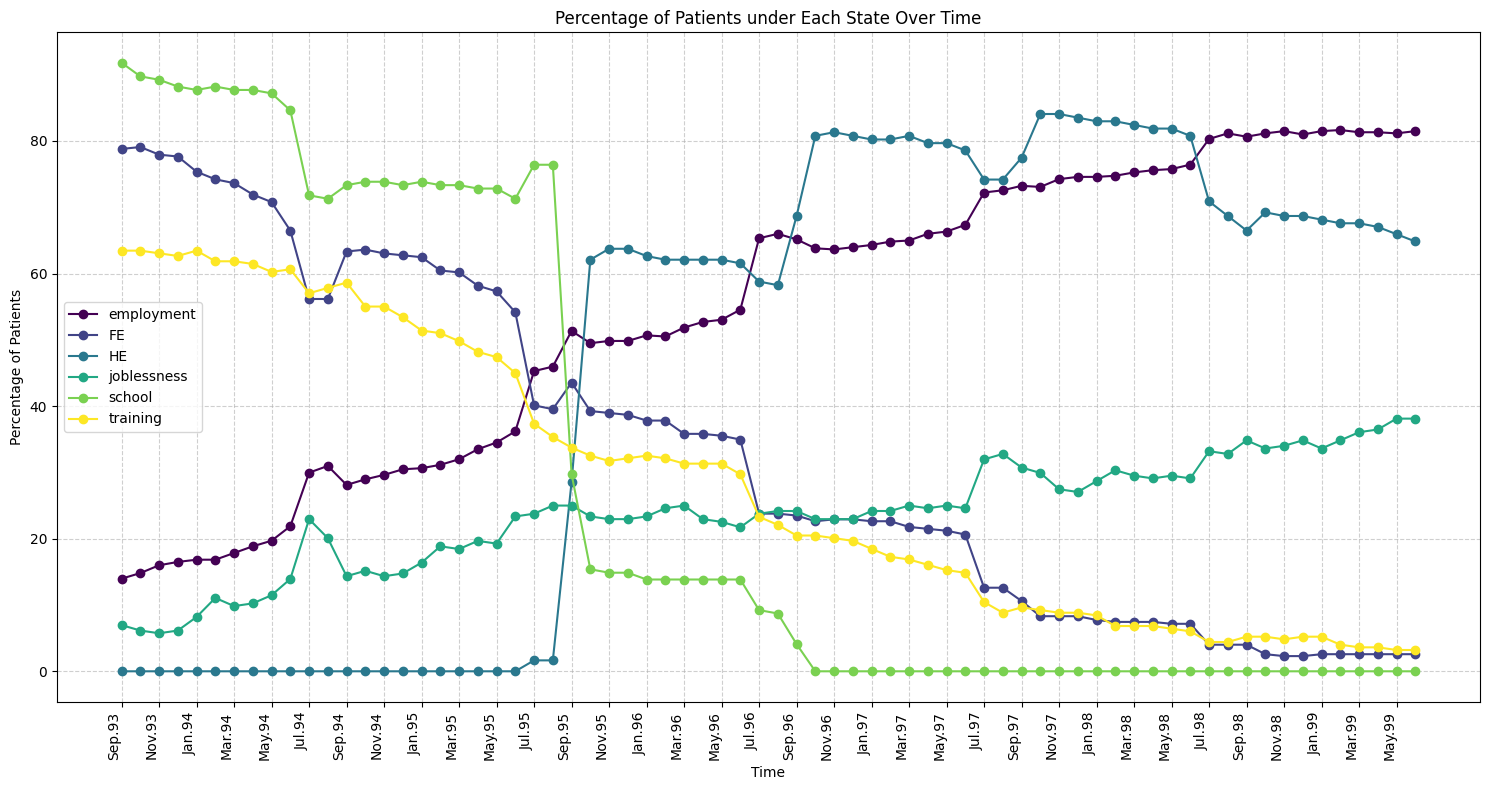

In [11]:
# Visualisation : pourcentage de patients sous chaque état (tous clusters confondus)
tca.plot_treatment_percentage()

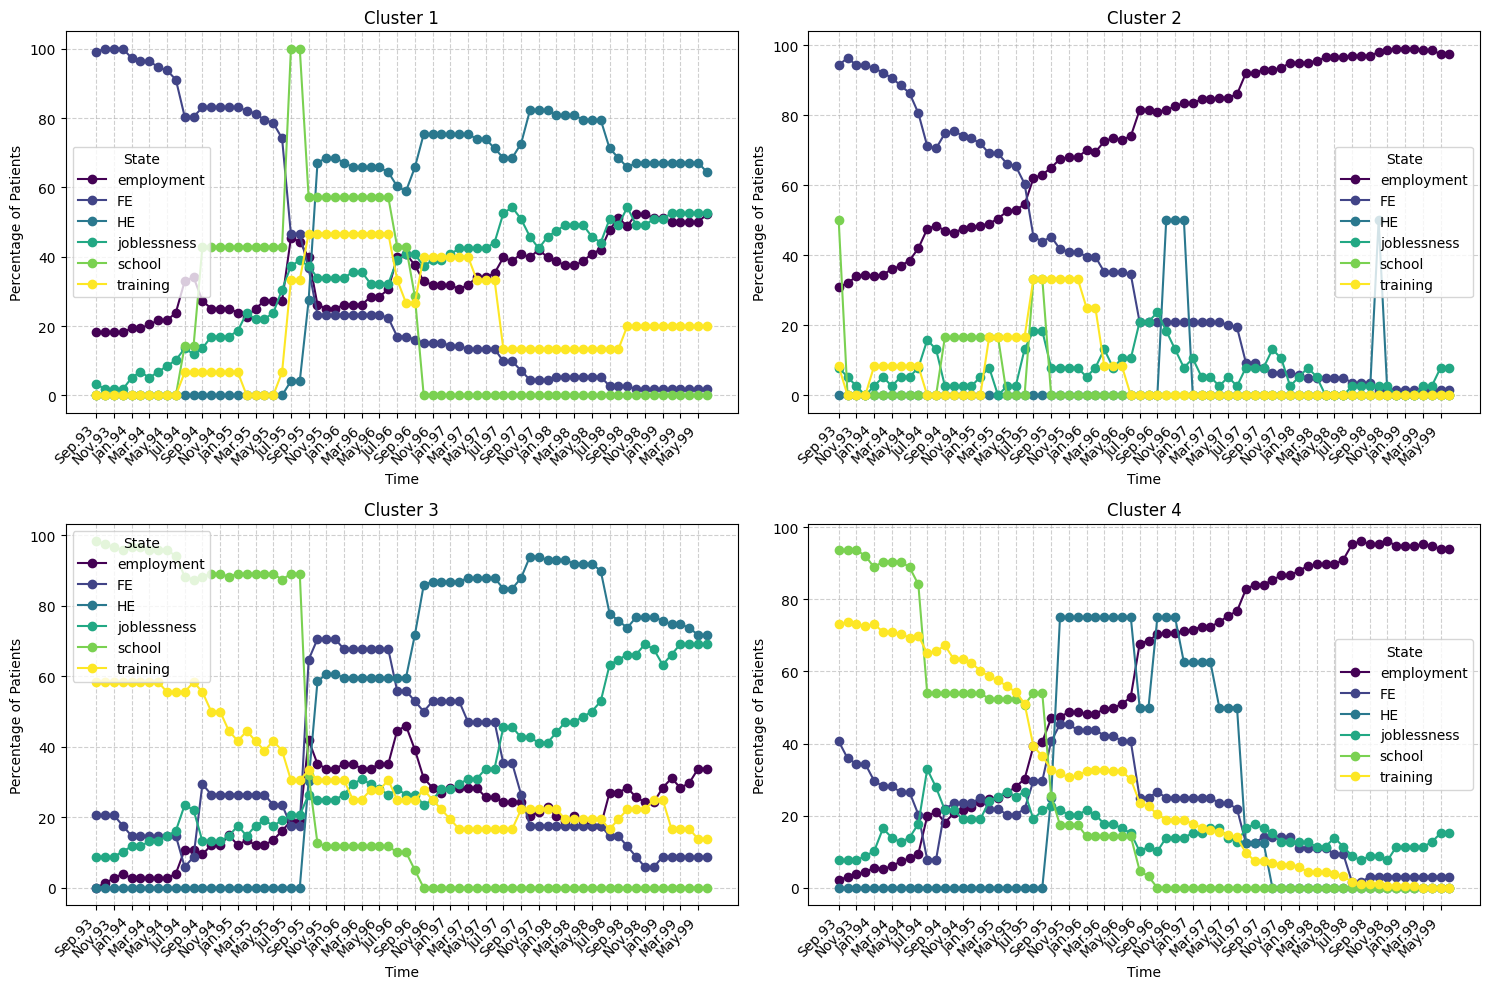

In [12]:
# Visualisation : pourcentage de patients sous chaque état par cluster
tca.plot_treatment_percentage(kmedoids_labels)

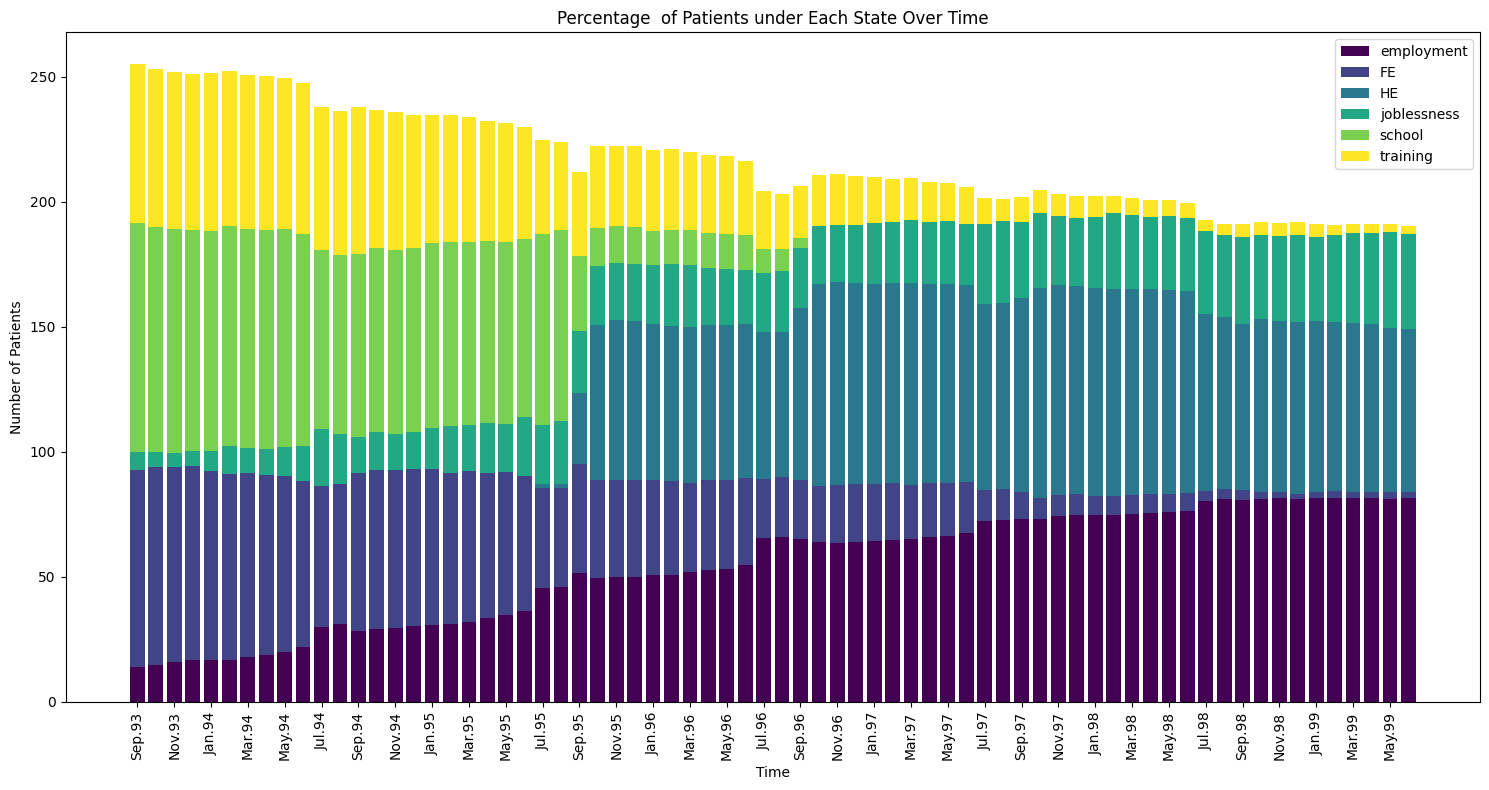

In [13]:
# Visualisation : barplots des pourcentages d'états (tous clusters confondus)
tca.bar_treatment_percentage()

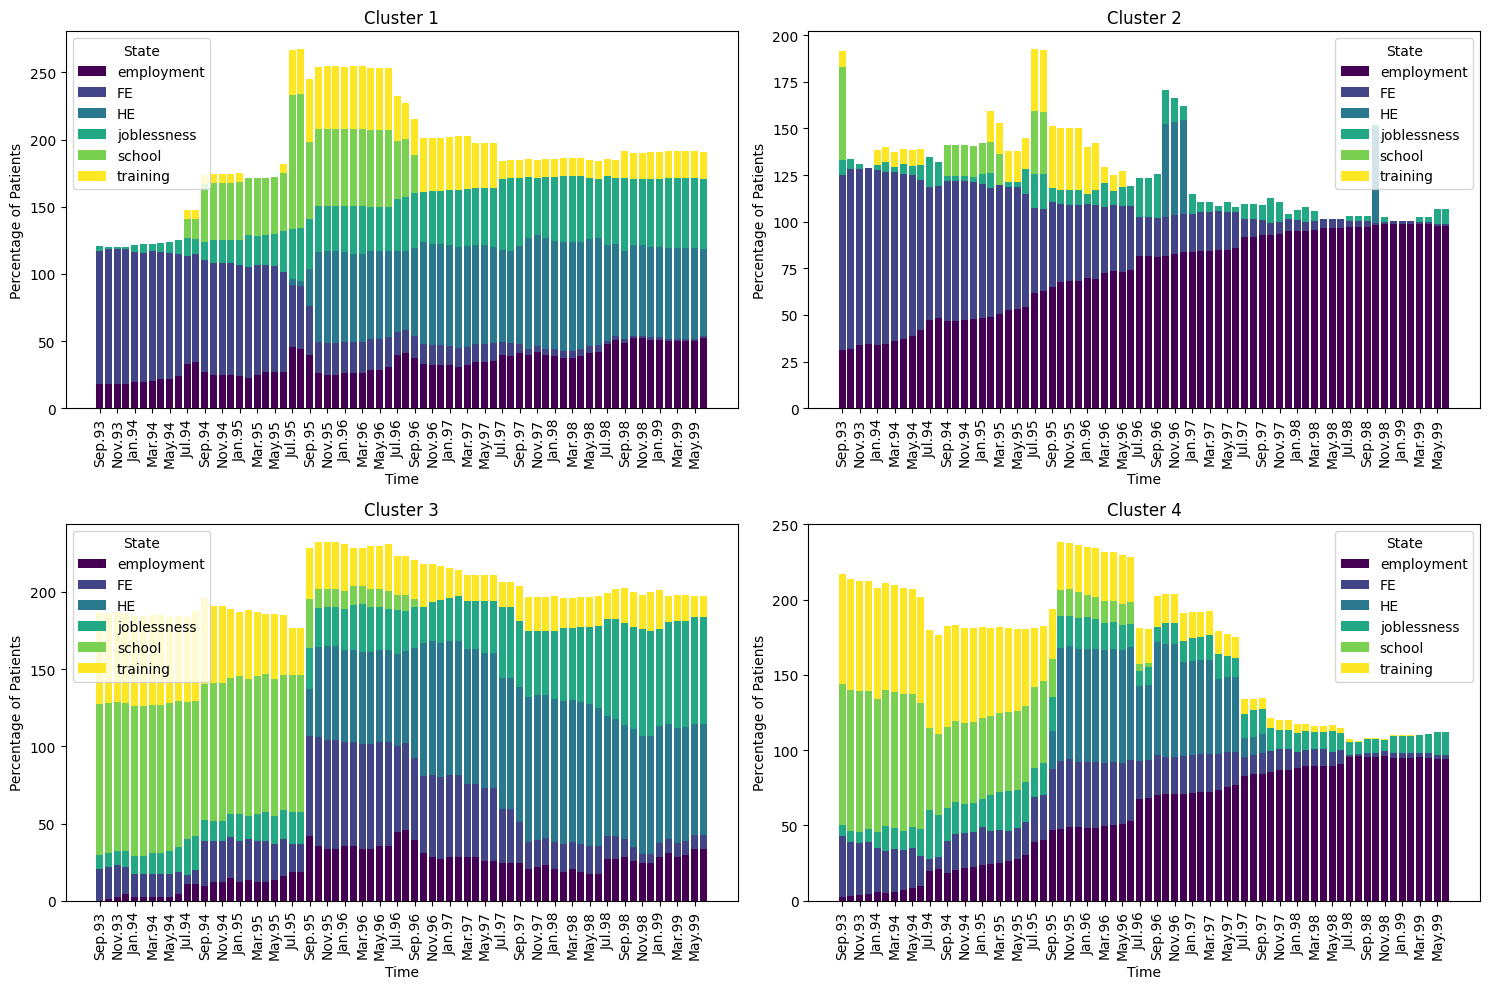

In [14]:
# Visualisation : barplots des pourcentages d'états par cluster
tca.bar_treatment_percentage(kmedoids_labels)